# Panda Detection using YOLOv8: Model Loading and Inference

This notebook demonstrates the complete process of performing object detection using the state-of-the-art YOLOv8 model, powered by the ultralytics framework. The workflow covers installing the necessary libraries, loading a pre-trained detection model, and running inference (detection) on a test image to identify objects (likely pandas, based on the file paths) and output their bounding boxes and confidence scores

**Tools:**
- YOLO models (ultralytics),
- Image handling (opencv),
- Progress tracking (tqdm),
- PyTorch foundation (torch).

In [ ]:
!pip install ultralytics opencv-python-headless tqdm torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 11.2 MB/s eta 0:00:00


Panda Dataset

#### data.yaml (config content)

- train: /content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/images/train
- val: /content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/images/val
- nc: 1
- names: ['panda']


In [1]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
dataset_path = '/content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset'
config_file = '/content/drive/MyDrive/ColabNotebooks/CV/data.yaml'

assert os.path.exists(dataset_path), f"Dataset path does not exist: {dataset_path}"
assert os.path.exists(config_file), f"Config file does not exist: {config_file}"


### Loading v8 yolo model

In [ ]:
model = YOLO('yolov8n.pt')

### Training

In [7]:
model.train(
    data=config_file,
    epochs=50,
    batch=16,
    imgsz=640,
    name='yolov8_panda_detection',
    patience=10,
    lr0=0.01,
    device=device
)

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ColabNotebooks/CV/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=yolov8_panda_detection5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/labels/train.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_panda_detection5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_panda_detection5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.32G      2.092      3.328      2.272         11        640: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         12         12      0.124     0.0833      0.091     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.26G      1.979      3.176      2.188         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         12         12      0.576       0.25      0.282     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.28G      1.845      2.484       2.12         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         12         12      0.593      0.245      0.249     0.0891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G       1.54      2.124      1.969         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         12         12      0.532      0.167      0.183      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.26G       1.34      1.829      1.824         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         12         12      0.744      0.244      0.285      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G      1.337      1.813      1.793         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]


                   all         12         12      0.508       0.25      0.347      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.26G     0.9602      1.524      1.528         10        640: 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         12         12      0.737       0.25      0.401      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G      1.084      1.502      1.626         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         12         12      0.644       0.25      0.351       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.27G     0.9646      1.397      1.489         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         12         12      0.741      0.241      0.323       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.27G     0.8458      1.286      1.375         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         12         12          1        0.3      0.495      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.27G     0.8002      1.228      1.331         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         12         12      0.671      0.167      0.366      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.27G      0.738       1.17      1.251         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all         12         12      0.542        0.3      0.331       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.27G     0.7388      1.115      1.272         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         12         12      0.665      0.332      0.352      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.28G     0.6587      1.075      1.249         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         12         12      0.608       0.39      0.356      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.27G     0.7694       1.17      1.414         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         12         12       0.43      0.333      0.387      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.26G     0.6955      1.112      1.147         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         12         12      0.574      0.417       0.44      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.28G     0.7063      1.127      1.208         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         12         12      0.567      0.417      0.471      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.28G     0.5848       1.03      1.197         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         12         12      0.631      0.572       0.57       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G     0.6004     0.9945       1.21         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         12         12      0.505        0.5      0.519      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.28G     0.5503     0.9761      1.154         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         12         12      0.651      0.583      0.586      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.27G     0.6102     0.9629       1.23         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         12         12      0.877      0.598      0.676      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.28G     0.5638     0.8999      1.198         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all         12         12      0.884      0.637      0.691      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.28G      0.564     0.9315      1.187         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all         12         12          1      0.654      0.774      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.27G     0.5766     0.9142      1.198         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         12         12      0.994      0.667       0.79      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.28G     0.5696     0.8931      1.178         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         12         12          1      0.654      0.754      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.27G     0.5373      0.899      1.135         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         12         12      0.873      0.574      0.717      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.27G     0.5342     0.8208      1.125         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         12         12      0.771       0.75      0.751      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.28G     0.5267     0.8317       1.13         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         12         12      0.899      0.744      0.758      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.28G     0.5599     0.8497      1.161         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         12         12      0.808      0.667      0.758      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.28G      0.485     0.7518      1.072         10        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         12         12      0.883       0.75      0.771      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.28G     0.4603     0.7556      1.085         11        640: 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         12         12          1      0.734      0.781       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.27G     0.4571     0.7308      1.059         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         12         12      0.994       0.75       0.79      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.28G     0.4656      0.784      1.063         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         12         12       0.97       0.75      0.788      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.28G     0.4827     0.7229      1.079         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all         12         12      0.985       0.75      0.775      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.28G     0.4522     0.7298      1.056         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         12         12      0.973       0.75      0.773      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.28G      0.433     0.6861      1.026         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         12         12      0.992       0.75      0.775      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.27G     0.4552     0.7128      1.028         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         12         12          1      0.743       0.78      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.28G     0.4007     0.6832       1.06         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         12         12      0.974      0.667      0.772      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.28G      0.399     0.6951      1.062         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         12         12       0.85       0.75      0.765      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.28G       0.39     0.6655      1.015         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         12         12       0.81       0.75      0.748      0.496


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.27G     0.4161     0.6479      1.025         10        640: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         12         12      0.769       0.75      0.748      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.27G     0.3867     0.6432      1.022         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         12         12      0.814       0.75      0.756      0.476
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



42 epochs completed in 0.034 hours.
Optimizer stripped from runs/detect/yolov8_panda_detection5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_panda_detection5/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_panda_detection5/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


                   all         12         12      0.993       0.75       0.79      0.579
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/yolov8_panda_detection5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d83f667e6b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Evaluating

In [3]:
metrics = model.val()
print(metrics)

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


                   all         12         12      0.983       0.75      0.892      0.605
Speed: 0.3ms preprocess, 16.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolov8_panda_detection42
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d83ed701c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,   

### making box in a new image

In [6]:
results = model('/content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/images/test/09a1d6c384764e27.jpg')
print(results)


image 1/1 /content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/images/test/09a1d6c384764e27.jpg: 448x640 1 panda, 6.9ms
Speed: 2.4ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'panda'}
obb: None
orig_img: array([[[ 20,  45,  65],
        [ 26,  50,  74],
        [ 34,  55,  87],
        ...,
        [ 99, 128, 155],
        [ 97, 125, 155],
        [ 95, 123, 153]],

       [[ 18,  42,  62],
        [ 17,  39,  64],
        [ 30,  50,  81],
        ...,
        [ 96, 125, 152],
        [ 91, 119, 149],
        [ 89, 117, 147]],

       [[ 15,  32,  53],
        [ 15,  31,  54],
        [ 21,  37,  66],
        ...,
        [100, 129, 156],
        [ 95, 123, 153],
        [ 96, 124, 154]],

       ...,

       [[ 83, 119, 159],
        [ 64, 102, 137],
        [ 75, 114, 146],
        ...,
        [

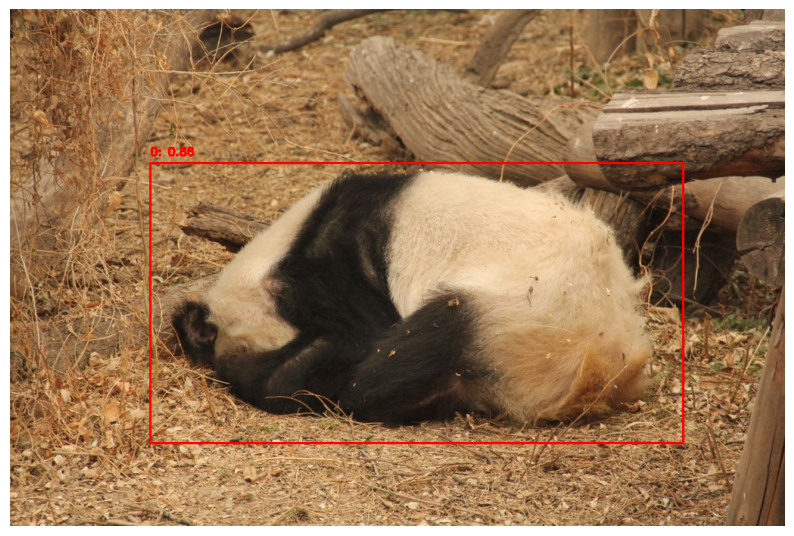

In [12]:
image_path = '/content/drive/MyDrive/ColabNotebooks/CV/Panda_dataset/images/test/09a1d6c384764e27.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].int().tolist()
        label = int(box.cls[0])  
        confidence = box.conf[0].item()
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, f"{label}: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
model.save('./model_weights.pth')

The YOLOv8 model's ability to detect objects within an image loaded from Google Drive. 

By applying the detection results (bounding box coordinates and confidence scores) and using OpenCV for visualization, 

the notebook confirms the model is operational and ready.